In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

In [ ]:
!unzip kagglecatsanddogs_3367a.zip


In [ ]:
import pandas as pd                                                             
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img   #for loading image nd intialization
warnings.filterwarnings('ignore')

In [ ]:
input_path = []  #creating 2 lists                                               
label = []   

for class_name in os.listdir("PetImages"):  #iterating directories                  
                             #class_name variable contains 2 values cat&dog          
    for path in os.listdir("PetImages/"+class_name): #iterarte each folder             
                                                                                
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/6745.jpg 0


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
#shuffle data 
df = df.sample(frac=1).reset_index(drop=True)  #reset_index in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1) 
                                               #or to reset multi level index //frac keyword argument specifies the fraction of rows to return in the random sample
df.head()                                      # so frac=1 means to return all rows (in random order)

,images,label
0,PetImages/Dog/10396.jpg,1
1,PetImages/Cat/2350.jpg,0
2,PetImages/Dog/7786.jpg,1
3,PetImages/Cat/1362.jpg,0
4,PetImages/Cat/8605.jpg,0


In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [ ]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

[]

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img) #converting img to array
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

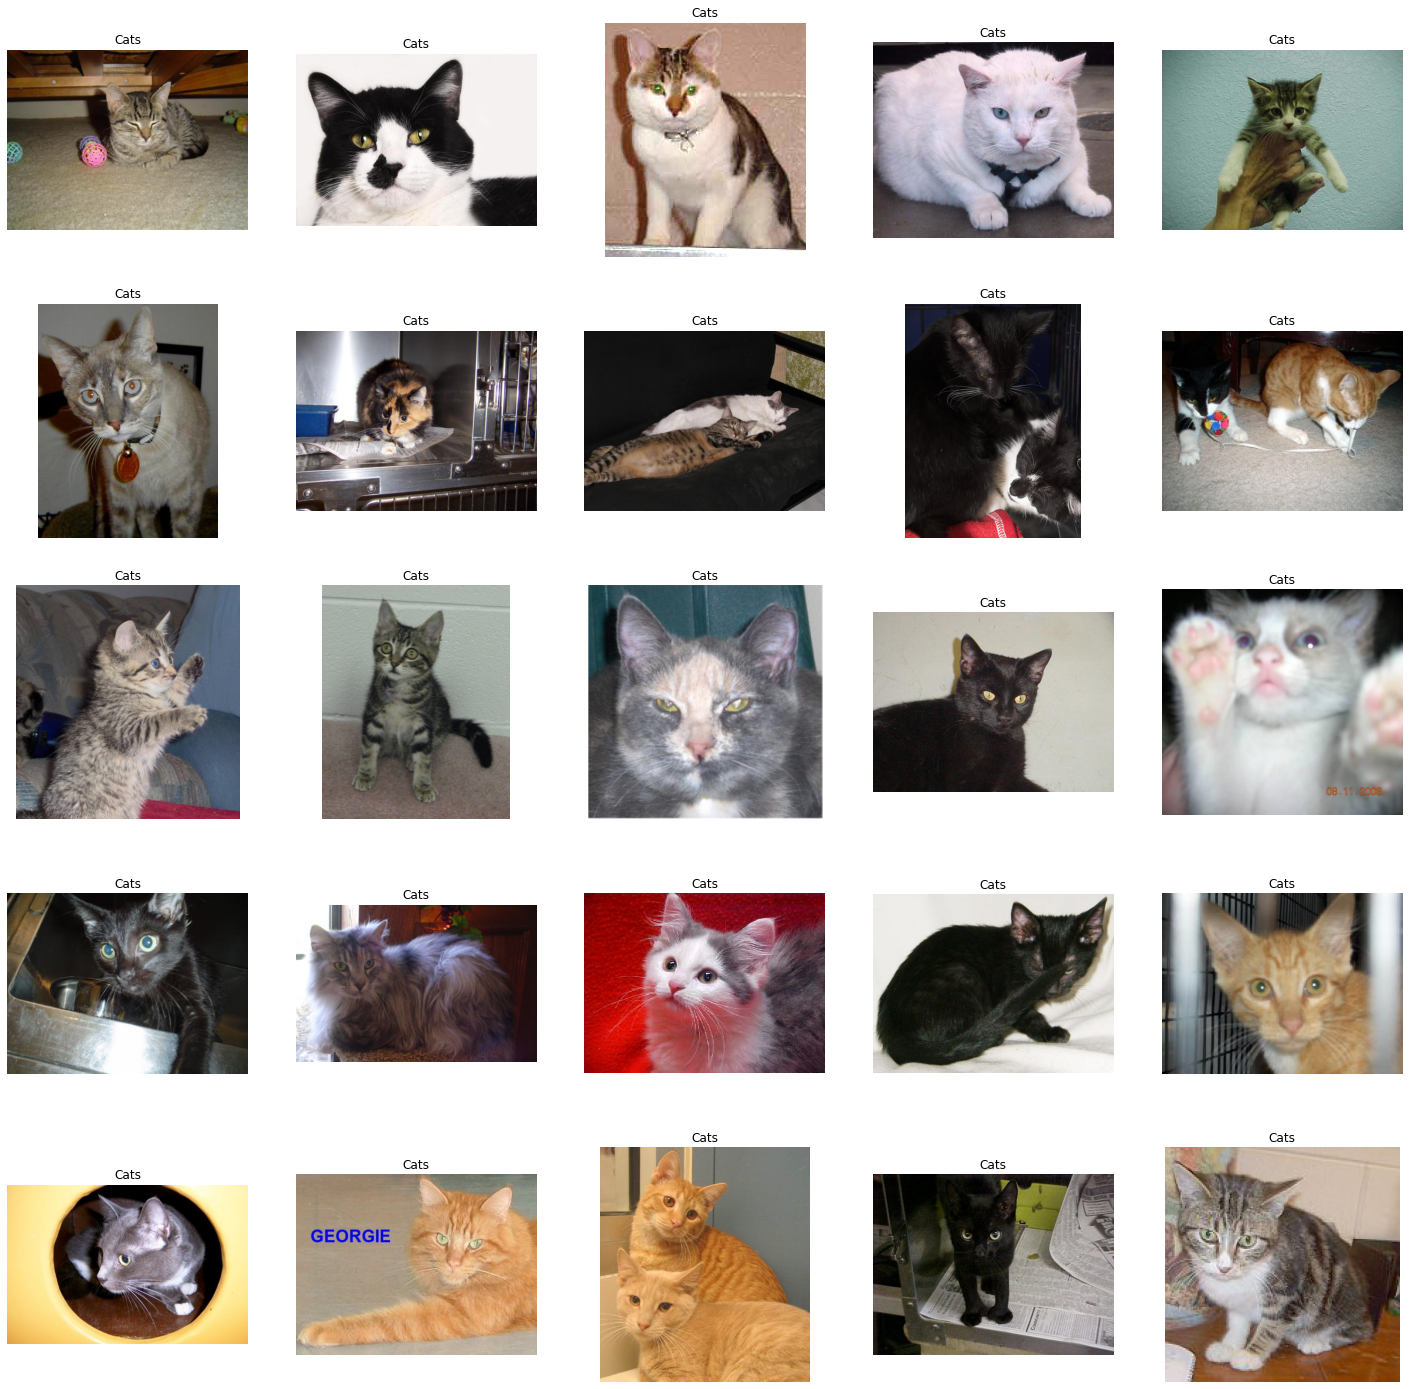

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):    #Enumeration means counting or reciting numbers or a numbered list
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

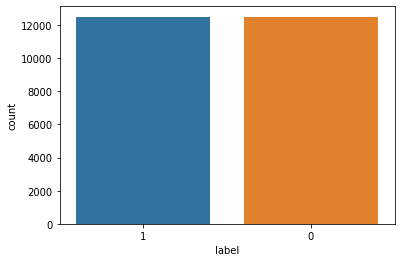

In [ ]:
import seaborn as sns   #see no. of classes
sns.countplot(df['label'])  #output me can see equal no. of distribution 12500 in both

In [ ]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/10396.jpg,1
1,PetImages/Cat/2350.jpg,0
2,PetImages/Dog/7786.jpg,1
3,PetImages/Cat/1362.jpg,0
4,PetImages/Cat/8605.jpg,0


In [ ]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/10396.jpg,1
1,PetImages/Cat/2350.jpg,0
2,PetImages/Dog/7786.jpg,1
3,PetImages/Cat/1362.jpg,0
4,PetImages/Cat/8605.jpg,0


In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.head()

,images,label
23290,PetImages/Cat/3912.jpg,0
17785,PetImages/Cat/7731.jpg,0
1020,PetImages/Cat/4371.jpg,0
12647,PetImages/Dog/7276.jpg,1
1533,PetImages/Dog/7928.jpg,1


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255) #for test data

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe( 
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
#Model Creation
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([  #arrange  layers in sequencial manner
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)), #here 16 are (hidden units) no of kernels/featureDetector/Filter
                                                        #3X3 is kernel size->filterMap//Resolution of image(128,128)*rbg(3)
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),  #for another layer
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),   #512 is no. of nuerons
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [ ]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)
#epochs is no. of  passes of the entire training dataset the machine learning algorithm has completed
#increases accuracy after 10 iterations

Epoch 1/10
40/40 [==============================] - 417s 10s/step - loss: 0.7755 - accuracy: 0.5263 - val_loss: 0.6673 - val_accuracy: 0.6132
Epoch 2/10
40/40 [==============================] - 425s 11s/step - loss: 0.6325 - accuracy: 0.6446 - val_loss: 0.5991 - val_accuracy: 0.6784
Epoch 3/10
40/40 [==============================] - 421s 10s/step - loss: 0.5857 - accuracy: 0.6888 - val_loss: 0.5965 - val_accuracy: 0.6644
Epoch 4/10
40/40 [==============================] - 415s 10s/step - loss: 0.5636 - accuracy: 0.7091 - val_loss: 0.5321 - val_accuracy: 0.7310
Epoch 5/10
40/40 [==============================] - 433s 11s/step - loss: 0.5313 - accuracy: 0.7358 - val_loss: 0.5074 - val_accuracy: 0.7504
Epoch 6/10
40/40 [==============================] - 422s 10s/step - loss: 0.5261 - accuracy: 0.7373 - val_loss: 0.4916 - val_accuracy: 0.7570
Epoch 7/10
40/40 [==============================] - 419s 10s/step - loss: 0.4959 - accuracy: 0.7567 - val_loss: 0.4849 - val_accuracy: 0.7614
Epoch 

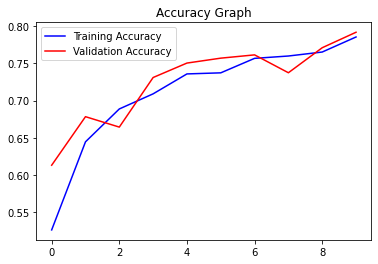

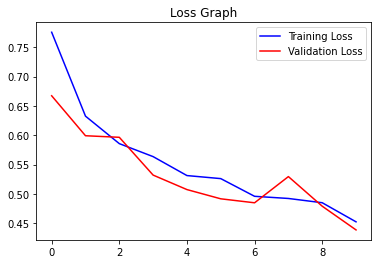

In [ ]:
#Visualization of Results#
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()